In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
train_data = datasets.MNIST(
    root="data",
    train = True,
    transform = ToTensor(),
    download= True
)

test_data = datasets.MNIST(
    root="data",
    train = False,
    transform = ToTensor(),
    download= True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [7]:
from torch.utils.data import DataLoader

loaders = {

    "train": DataLoader(train_data, 
                        batch_size=100, 
                        shuffle=True,
                        num_workers=1),

    "test": DataLoader(test_data, 
                        batch_size=100, 
                        shuffle=True,
                        num_workers=1),
}

In [8]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x16940cfff90>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x169409ee2d0>}

In [9]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()  # regularization layer
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):  # defines the activation
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.log_softmax(x)


In [10]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\tLoss: {loss.item():.6f}")

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders['test'].dataset)} ({100. * correct / len(loaders['test'].dataset):.0f}%)\n")

In [11]:
for epoch in range(1, 11):
    train(epoch)
    test()

C:\Users\kilio\AppData\Local\Temp\ipykernel_15160\4133796389.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.315071
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.121290
Train Epoch: 1 [4000/60000 (7%)]	Loss: 1.615771
Train Epoch: 1 [6000/60000 (10%)]	Loss: 1.259906
Train Epoch: 1 [8000/60000 (13%)]	Loss: 1.018365
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.869551
Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.609158
Train Epoch: 1 [14000/60000 (23%)]	Loss: 0.629324
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.510023
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.605918
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.425496
Train Epoch: 1 [22000/60000 (37%)]	Loss: 0.640551
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.535005
Train Epoch: 1 [26000/60000 (43%)]	Loss: 0.454369
Train Epoch: 1 [28000/60000 (47%)]	Loss: 0.371365
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.658469
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.413394
Train Epoch: 1 [34000/60000 (57%)]	Loss: 0.409198
Train Epoch: 1 [36000/60000 (60%)]	Loss: 0.454471
Train Epoch: 1 [38000/60000 (63%)]	Loss: 0.430997
Train Epoch

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
Prediction: 7


C:\Users\kilio\AppData\Local\Temp\ipykernel_15160\4133796389.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


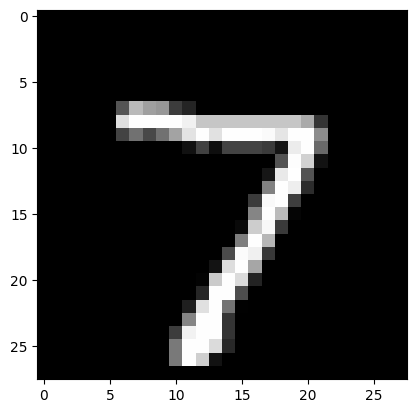

In [13]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[0]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f"Prediction: {prediction}")

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

Prediction: 2


C:\Users\kilio\AppData\Local\Temp\ipykernel_15160\4133796389.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


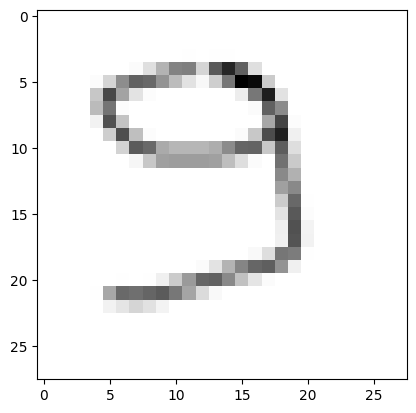

In [21]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load the image
image_path = "Digits/9.png"  # Provide the path to your image
image = Image.open(image_path).convert('L')  # Convert to grayscale if necessary

# Define the transformations to match the model's input requirements
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize to the model's expected input size (example for MNIST-like models)
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize (adjust based on model training)
])

# Apply the transformations
image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to correct device

# Set the model to evaluation mode
model.eval()

# Perform prediction
with torch.no_grad():  # Disable gradient calculations for inference
    output = model(image_tensor)
    prediction = output.argmax(dim=1, keepdim=True).item()

# Print the prediction
print(f"Prediction: {prediction}")

# Display the image
image_to_show = image_tensor.squeeze(0).squeeze(0).cpu().numpy()  # Remove batch and channel dimensions
plt.imshow(image_to_show, cmap='gray')
plt.show()
